In [129]:
import numpy as np
from matplotlib import pyplot as plt
import ants # takes a while to import
import os
from tqdm import tqdm
import statistics

In [2]:
pwd

'/mmfs1/data/pijarj/BC-ORG-Data/Code'

In [3]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [4]:
diffmats = np.load('../../Data/Genemaps/CVAE_diffmats_S661.npy')
diffmats.shape

(661, 51, 51)

In [5]:
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')

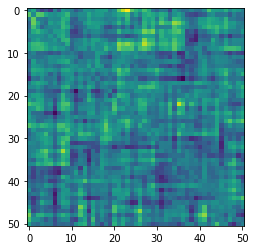

In [6]:
plt.imshow(diffmats[0,:,:]) # correlation matrix for first subject

In [7]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [8]:
nsubjects = diffmats.shape[0] #661
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

661
13


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmats[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 13/13 [00:04<00:00,  2.65it/s]


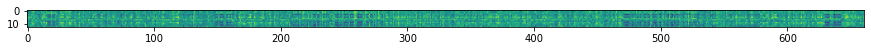

In [10]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [11]:
gene_fmri_corr[:,0] # all maps for first subject

array([-0.01415417, -0.03363246, -0.07089744, -0.0257553 , -0.03546364,
        0.04320654, -0.01399076,  0.00874797, -0.00172977,  0.00163777,
       -0.00717648, -0.05976043, -0.05466849])

In [ ]:
gene_fmri_corr[0,:] # all subjects for first gene

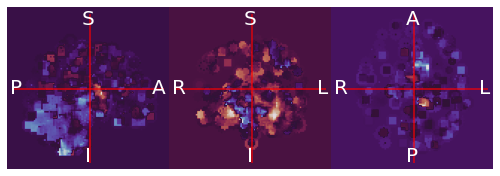

-0.014154168013671696


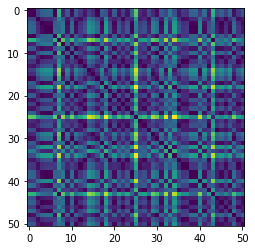

In [12]:
#correlation between diffmat of subject and gene
diffmats = np.load('../../Data/Genemaps/CVAE_diffmats_S661.npy')
subject_diffmat = diffmats[0,:,:]
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
gene_im = ants.image_read('../../Data/Genemaps/gene_22585_NLGN4Y_22829.0.nii.gz')
gene_im.plot_ortho(flat=True,cmap='twilight')
gene_flat = gene_im.numpy().flatten()
atlas_flat = atlas.numpy().flatten()
roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
gene_sim = np.zeros((51,51))
for i in range(51):
    for j in range(51):
        gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])
plt.imshow(gene_sim)
triu = np.triu_indices(51,k=1)
gene_vec = gene_sim[triu]
fmri_vec = subject_diffmat[triu]
data = np.corrcoef(gene_vec,fmri_vec)[0,1]
print(data)

Text(0, 0.5, 'Amount of Subjects')

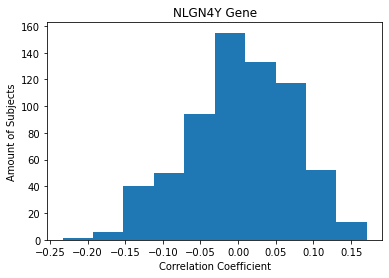

In [14]:
#histogram for first gene, NLGN4Y
g1 = gene_fmri_corr[0,:]
plt.hist(g1)
plt.title('NLGN4Y Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

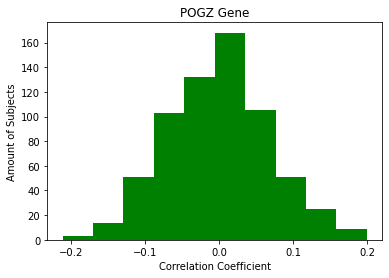

In [152]:
#histogram for second gene, POGZ
g1 = gene_fmri_corr[1,:]
plt.hist(g1,color='green')
plt.title('POGZ Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

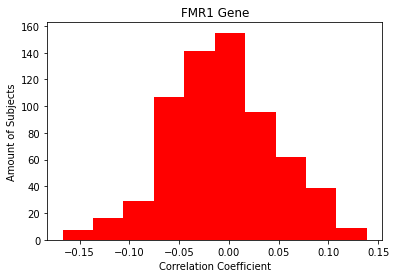

In [161]:
#histogram for third gene, FMR1
g1 = gene_fmri_corr[2,:]
plt.hist(g1,color='red')
plt.title('FMR1 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

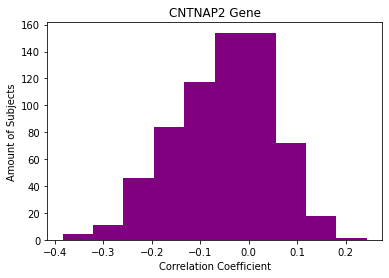

In [51]:
#histogram for fourth gene, CNTNAP2
g1 = gene_fmri_corr[3,:]
plt.hist(g1,color='purple')
plt.title('CNTNAP2 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

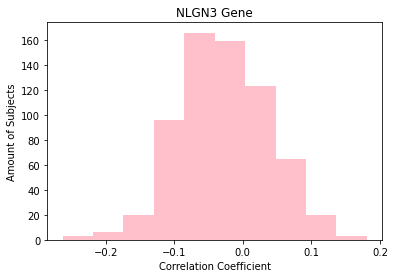

In [52]:
#histogram for fifth gene, NLGN3
g1 = gene_fmri_corr[4,:]
plt.hist(g1,color='pink')
plt.title('NLGN3 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

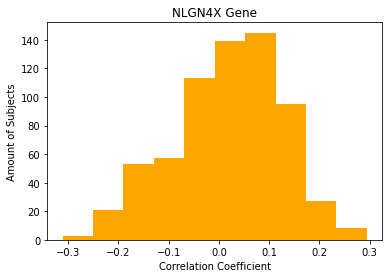

In [53]:
#histogram for sixth gene, NLGN4X
g1 = gene_fmri_corr[5,:]
plt.hist(g1,color='orange')
plt.title('NLGN4X Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

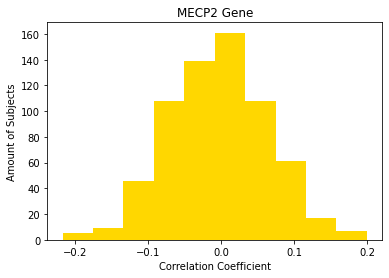

In [54]:
#histogram for seventh gene, MECP2
g1 = gene_fmri_corr[6,:]
plt.hist(g1,color='gold')
plt.title('MECP2 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

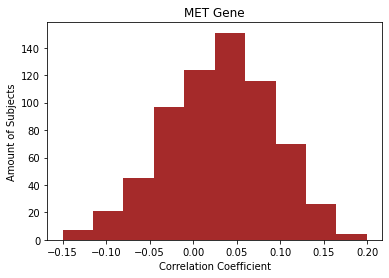

In [55]:
#histogram for eighth gene, MET
g1 = gene_fmri_corr[7,:]
plt.hist(g1,color='brown')
plt.title('MET Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

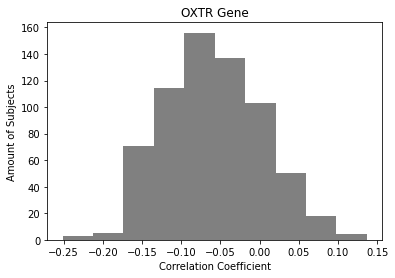

In [56]:
#histogram for ninth gene, OXTR
g1 = gene_fmri_corr[8,:]
plt.hist(g1,color='gray')
plt.title('OXTR Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

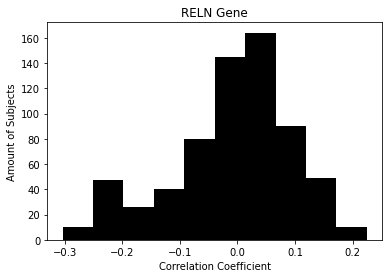

In [57]:
#histogram for tenth gene, RELN
g1 = gene_fmri_corr[9,:]
plt.hist(g1,color='black')
plt.title('RELN Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

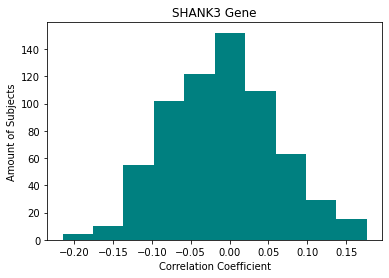

In [58]:
#histogram for eleventh gene, SHANK3
g1 = gene_fmri_corr[10,:]
plt.hist(g1,color='teal')
plt.title('SHANK3 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

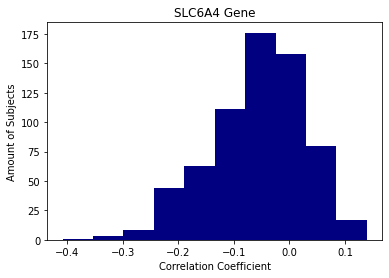

In [162]:
#histogram for twelfth gene, SLC6A4
g1 = gene_fmri_corr[11,:]
plt.hist(g1,color='navy')
plt.title('SLC6A4 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

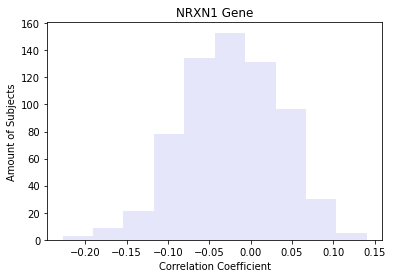

In [67]:
#histogram for thirteenth gene, NRXN1
g1 = gene_fmri_corr[12,:]
plt.hist(g1,color='lavender')
plt.title('NRXN1 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

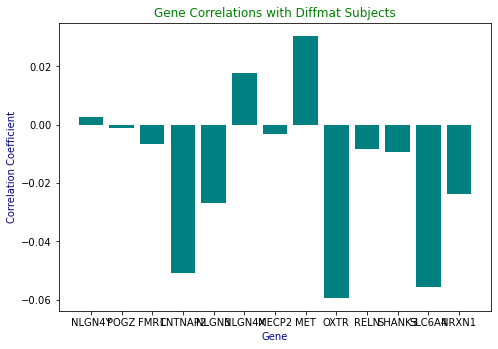

In [173]:
#bar graph of sum of correlation coefficients for all genes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
g1 = statistics.mean(gene_fmri_corr[0,:])
g2 = statistics.mean(gene_fmri_corr[1,:])
g3 = statistics.mean(gene_fmri_corr[2,:])
g4 = statistics.mean(gene_fmri_corr[3,:])
g5 = statistics.mean(gene_fmri_corr[4,:])
g6 = statistics.mean(gene_fmri_corr[5,:])
g7 = statistics.mean(gene_fmri_corr[6,:])
g8 = statistics.mean(gene_fmri_corr[7,:])
g9 = statistics.mean(gene_fmri_corr[8,:])
g10 = statistics.mean(gene_fmri_corr[9,:])
g11 = statistics.mean(gene_fmri_corr[10,:])
g12 = statistics.mean(gene_fmri_corr[11,:])
g13 = statistics.mean(gene_fmri_corr[12,:])
g = [g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13]
ax.bar(labels,g,color='teal')
plt.title('Gene Correlations with Diffmat Subjects',color='green')
plt.ylabel('Correlation Coefficient',color='navy')
plt.xlabel('Gene',color='navy')
plt.show()